## The global warming issue and Narratives around it<br>
### Part 3: Performing EDA on the pickled reddit dataset

In this notebook, I explore several aspects of the dataframe and also prepare the dataframe objects for further modeling.


Importing the require libraries:

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

import regex as re
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression


from nltk.corpus import stopwords

import pickle

%config InlineBackend.figure_format = 'retina'

### Part 3.1: Importing the saved dataframe

In [2]:
df_reddit = pickle.load(open('../datasets/df_reddit.pkl', 'rb'))
df_reddit.head()

,author,created_utc,domain,id,num_comments,over_18,post_hint,score,text_merged,subreddit
0,Kafka15,1593554514,i.redd.it,hixbtf,2,False,image,1,cum,GlobalWarming
1,karan_negiiiii,1593497051,boringworld.org,hihj6s,0,False,Empty,1,climat chang india,GlobalWarming
2,Hildavardr,1593479932,self.GlobalWarming,hidb5h,0,False,Empty,1,global warm respons big compani,GlobalWarming
3,pEppapiGistfuhrer,1593455137,i.redd.it,hi5h41,1,False,image,1,ayi let stop global warm,GlobalWarming
4,BrexitBlaze,1593455005,theguardian.com,hi5feq,2,False,link,2,uk minist send mix messag climat commit say fu...,GlobalWarming


In [3]:
df_reddit.shape

(4828, 10)

# Feature engineering: adding three new columns

## Numerical features

---

In [4]:
#Counting the charcaters and word in "text_merged"
#df_reddit["text_char_count"] = df_reddit["text_merged"].map(lambda x: len(x))
df_reddit["word_count*"] = df_reddit["text_merged"].map(lambda x: len(x.split(" ")))

#Sentiment analyzer
sent = SentimentIntensityAnalyzer()

df_reddit['sentiment_score*'] = df_reddit["text_merged"].apply(lambda x: sent.polarity_scores(x)['compound'])


df_reddit['date'] = pd.to_datetime(df_reddit['created_utc'],unit='s')


---

In [5]:
df_reddit.shape

(4828, 13)

In [6]:
df_reddit["subreddit"].unique()

array(['GlobalWarming', 'ConspiracyTheory'], dtype=object)

- Defining the target:

In [7]:
df_reddit['target'] = df_reddit['subreddit'].replace({"GlobalWarming": 1, "ConspiracyTheory": 0})
targets = df_reddit['target']

In [8]:
df_reddit.head(2)

,author,created_utc,domain,id,num_comments,over_18,post_hint,score,text_merged,subreddit,word_count*,sentiment_score*,date,target
0,Kafka15,1593554514,i.redd.it,hixbtf,2,False,image,1,cum,GlobalWarming,1,0.0,2020-06-30 22:01:54,1
1,karan_negiiiii,1593497051,boringworld.org,hihj6s,0,False,Empty,1,climat chang india,GlobalWarming,3,0.0,2020-06-30 06:04:11,1


Exploring the ["text_merged"] column:

In [9]:
df_reddit["text_merged"][5]

'mmm ye'

In [10]:
#df_reddit["domain"].value_counts()
df_reddit.drop(columns="domain", inplace = True)

Looks good !
Now, checking the counts:

In [11]:
sub_gw_mask = df_reddit["target"] == 1
sub_ct_mask = df_reddit["target"] == 0
df_reddit[sub_ct_mask]["text_merged"].count()

894

In [12]:
df_reddit['target'] = df_reddit['subreddit'].replace({"GlobalWarming": 1, "ConspiracyTheory": 0})

In [13]:
df_reddit['over_18'] = df_reddit['over_18'].astype("int")

In [14]:
df_reddit.groupby("target")["sentiment_score*"].describe().T

target,0,1
count,894.000000,3934.000000
mean,-0.090773,0.061600
std,0.480822,0.388136
min,-0.996900,-0.997900
25%,-0.476700,0.000000
50%,0.000000,0.000000
75%,0.128000,0.226300
max,0.992700,0.998700


Checking for datatypes:

In [15]:
df_reddit

,author,created_utc,id,num_comments,over_18,post_hint,score,text_merged,subreddit,word_count*,sentiment_score*,date,target
0,Kafka15,1593554514,hixbtf,2,0,image,1,cum,GlobalWarming,1,0.0000,2020-06-30 22:01:54,1
1,karan_negiiiii,1593497051,hihj6s,0,0,Empty,1,climat chang india,GlobalWarming,3,0.0000,2020-06-30 06:04:11,1
2,Hildavardr,1593479932,hidb5h,0,0,Empty,1,global warm respons big compani,GlobalWarming,5,0.2263,2020-06-30 01:18:52,1
3,pEppapiGistfuhrer,1593455137,hi5h41,1,0,image,1,ayi let stop global warm,GlobalWarming,5,-0.0772,2020-06-29 18:25:37,1
4,BrexitBlaze,1593455005,hi5feq,2,0,link,2,uk minist send mix messag climat commit say fu...,GlobalWarming,13,0.2960,2020-06-29 18:23:25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,[deleted],1349719843,115d9u,0,0,Empty,0,us air forc superson fli saucer declassifi,ConspiracyTheory,7,0.0000,2012-10-08 18:10:43,0
4824,[deleted],1348231298,108ubr,0,0,Empty,1,dae think sin ruin r conspiraci fascist totali...,ConspiracyTheory,81,-0.9857,2012-09-21 12:41:38,0
4825,[deleted],1347716678,zxb87,1,0,Empty,9,conspiraci subreddit empti,ConspiracyTheory,3,0.0000,2012-09-15 13:44:38,0
4826,aayawa,1344626686,y0fkg,3,0,Empty,0,one world govern possibl stabl,ConspiracyTheory,5,0.0000,2012-08-10 19:24:46,0


In [16]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4828 entries, 0 to 4827
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   author            4828 non-null   object        
 1   created_utc       4828 non-null   int64         
 2   id                4828 non-null   object        
 3   num_comments      4828 non-null   int64         
 4   over_18           4828 non-null   int64         
 5   post_hint         4828 non-null   object        
 6   score             4828 non-null   int64         
 7   text_merged       4828 non-null   object        
 8   subreddit         4828 non-null   object        
 9   word_count*       4828 non-null   int64         
 10  sentiment_score*  4828 non-null   float64       
 11  date              4828 non-null   datetime64[ns]
 12  target            4828 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 490.5+ KB


In [17]:
df_reddit["post_hint"].unique()

array(['image', 'Empty', 'link', 'rich:video', 'hosted:video', 'self'],
      dtype=object)

## Exploring EDA through some VIZ

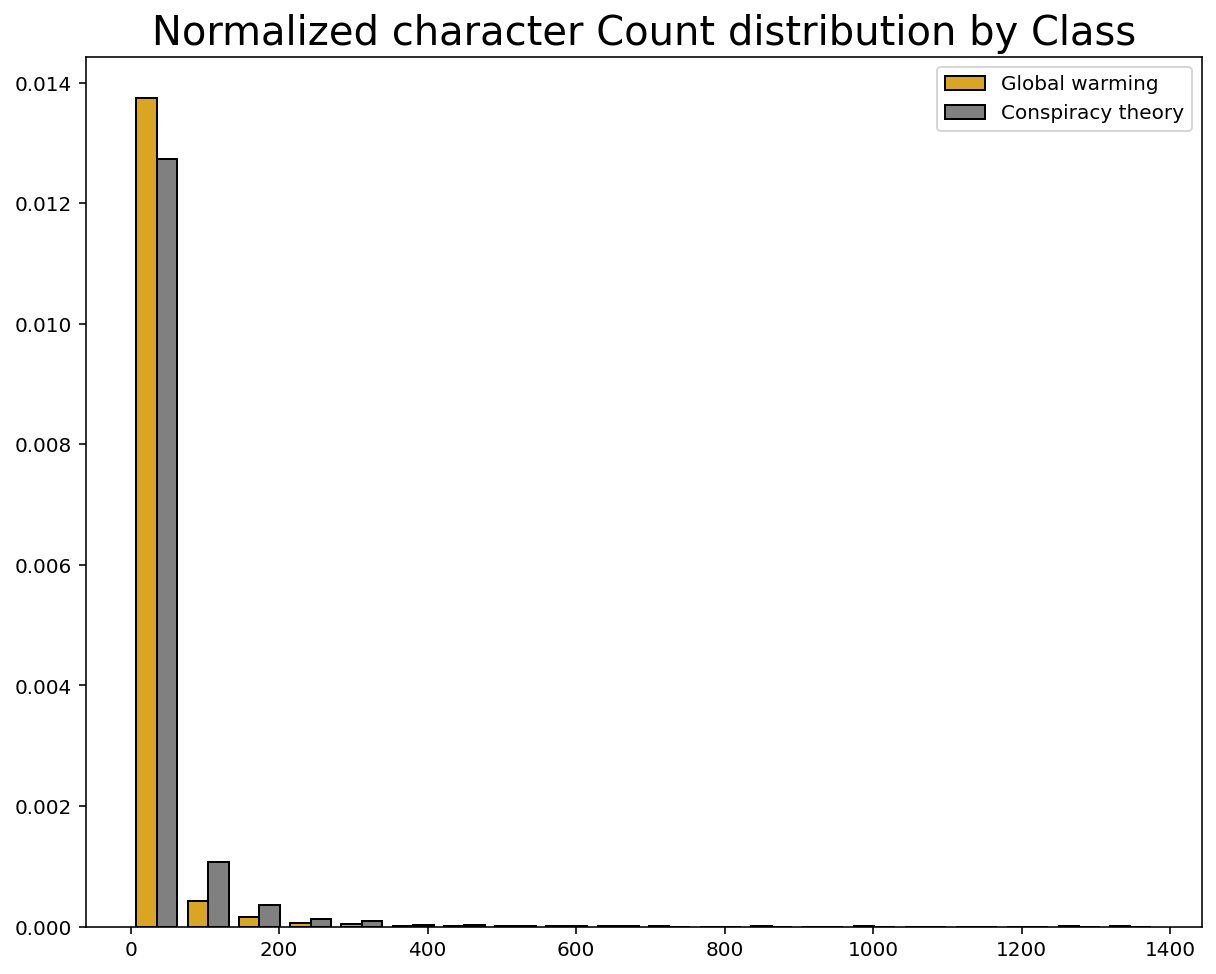

In [18]:
#%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(10,8))
plt.hist([df_reddit[sub_gw_mask]['word_count*'], 
          df_reddit[sub_ct_mask]['word_count*']],
         bins=20, color=['goldenrod', 'grey'], ec='k', density=True)
plt.title('Normalized character Count distribution by Class', fontsize=20)
plt.legend(['Global warming', 'Conspiracy theory'])
plt.show()

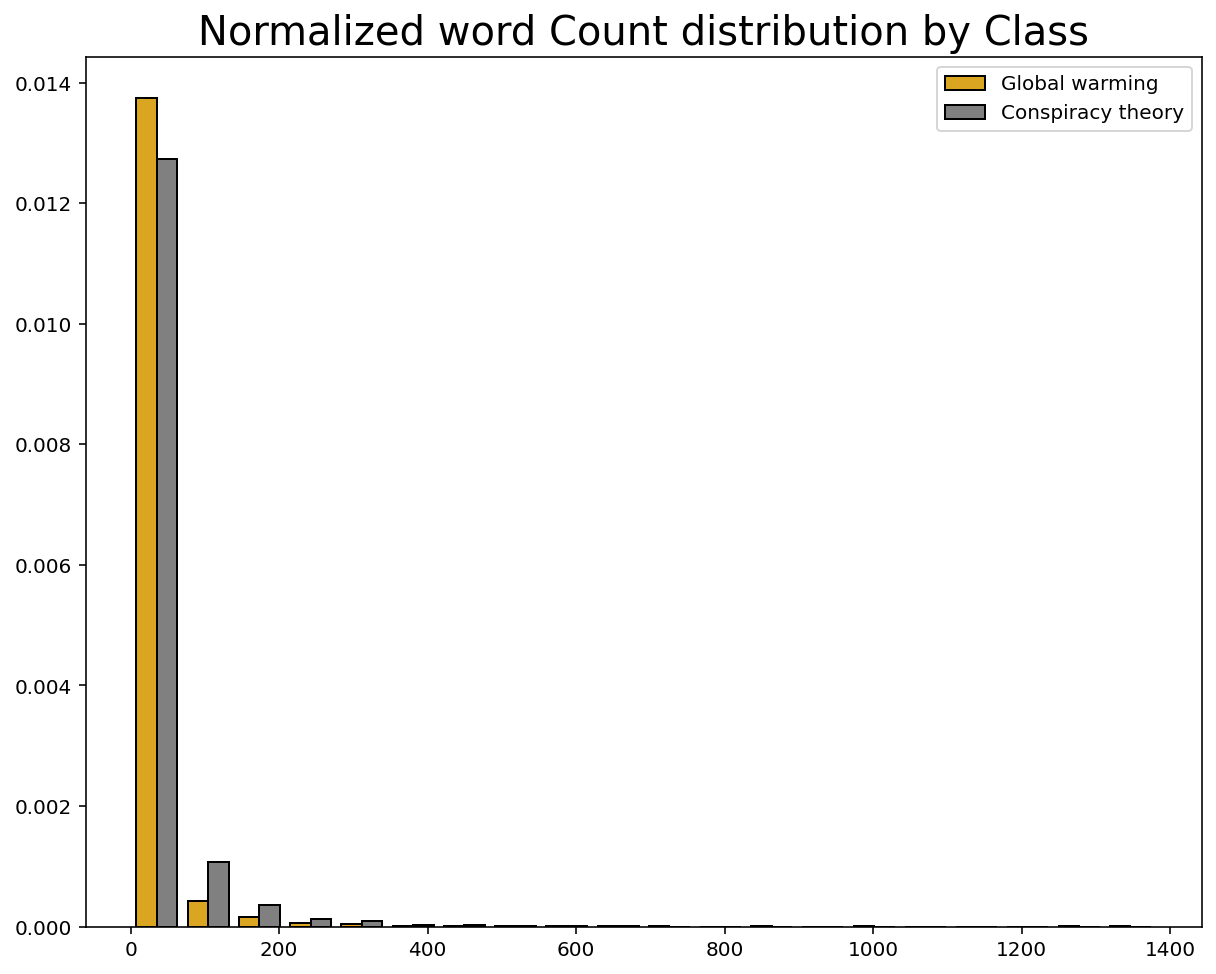

In [19]:
plt.figure(figsize=(10,8))
plt.hist([df_reddit[sub_gw_mask]['word_count*'], 
          df_reddit[sub_ct_mask]['word_count*']],
         bins=20, color=['goldenrod', 'grey'], ec='k', density=True)
plt.title('Normalized word Count distribution by Class', fontsize=20)
plt.legend(['Global warming', 'Conspiracy theory'])

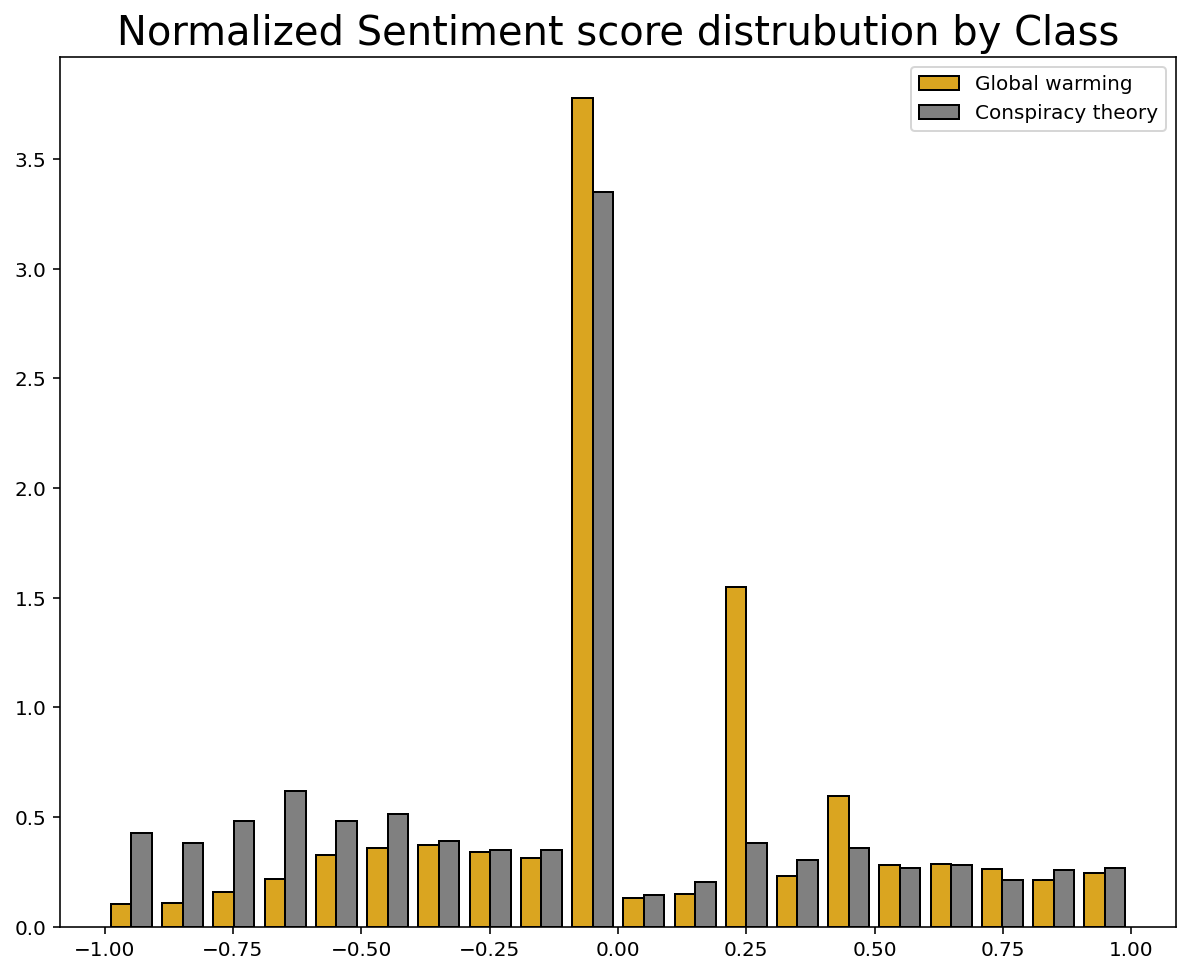

In [20]:
plt.figure(figsize=(10,8))
plt.hist([df_reddit[sub_gw_mask]['sentiment_score*'], 
          df_reddit[sub_ct_mask]['sentiment_score*']],
         bins=20, color=['goldenrod', 'grey'], ec='k', density=True)
plt.title('Normalized Sentiment score distrubution by Class', fontsize=20)
plt.legend(['Global warming', 'Conspiracy theory'])

## The correlation coefficients between variabels and target

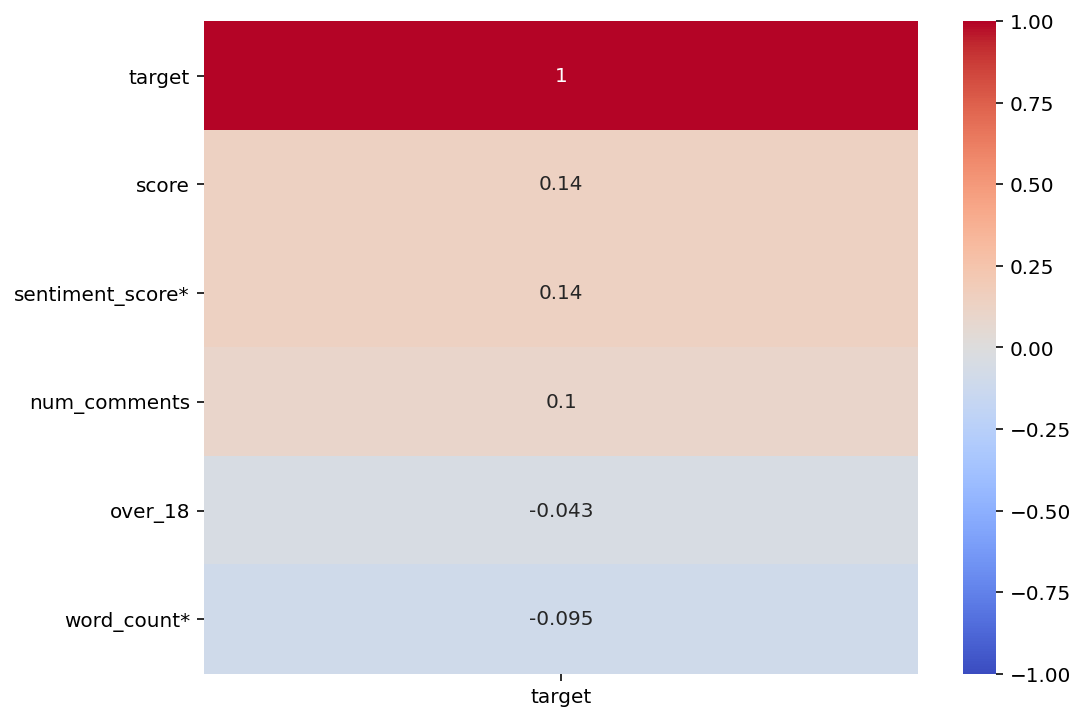

In [21]:
df_reddit_corr = df_reddit.drop(columns=["created_utc"]).corr()

#plt.figure(figsize=(6,6))
plt.figure(figsize=(8,6))
sns.heatmap(df_reddit_corr[['target']].sort_values(by=['target'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);
plt.savefig("../plots/EDA_corr_plots.png")

## Testing wheter time-series nature has any effect?

In [22]:
df_reddit['created_utc']

0       1593554514
1       1593497051
2       1593479932
3       1593455137
4       1593455005
           ...    
4823    1349719843
4824    1348231298
4825    1347716678
4826    1344626686
4827    1344530968
Name: created_utc, Length: 4828, dtype: int64

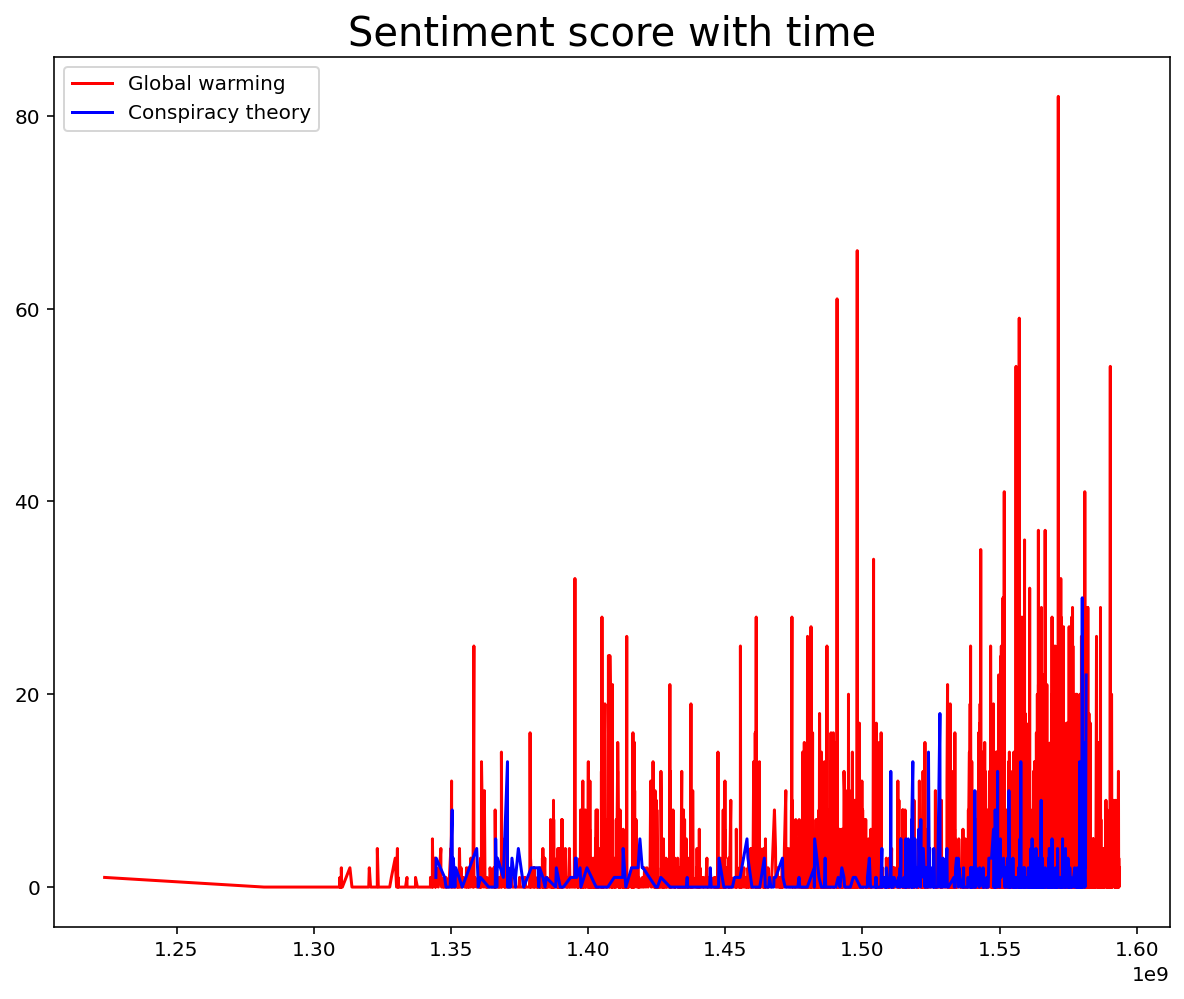

In [23]:
plt.figure(figsize=(10,8))
plt.plot(df_reddit[sub_gw_mask]['created_utc'], df_reddit[sub_gw_mask]['num_comments'], color="red")
plt.plot(df_reddit[sub_ct_mask]['created_utc'], df_reddit[sub_ct_mask]['num_comments'], color="blue")


plt.title('Sentiment score with time', fontsize=20)
plt.legend(['Global warming', 'Conspiracy theory'])

## Testing scatter plots for feature engineering purposes:

In [24]:
df_reddit.columns

Index(['author', 'created_utc', 'id', 'num_comments', 'over_18', 'post_hint',
       'score', 'text_merged', 'subreddit', 'word_count*', 'sentiment_score*',
       'date', 'target'],
      dtype='object')

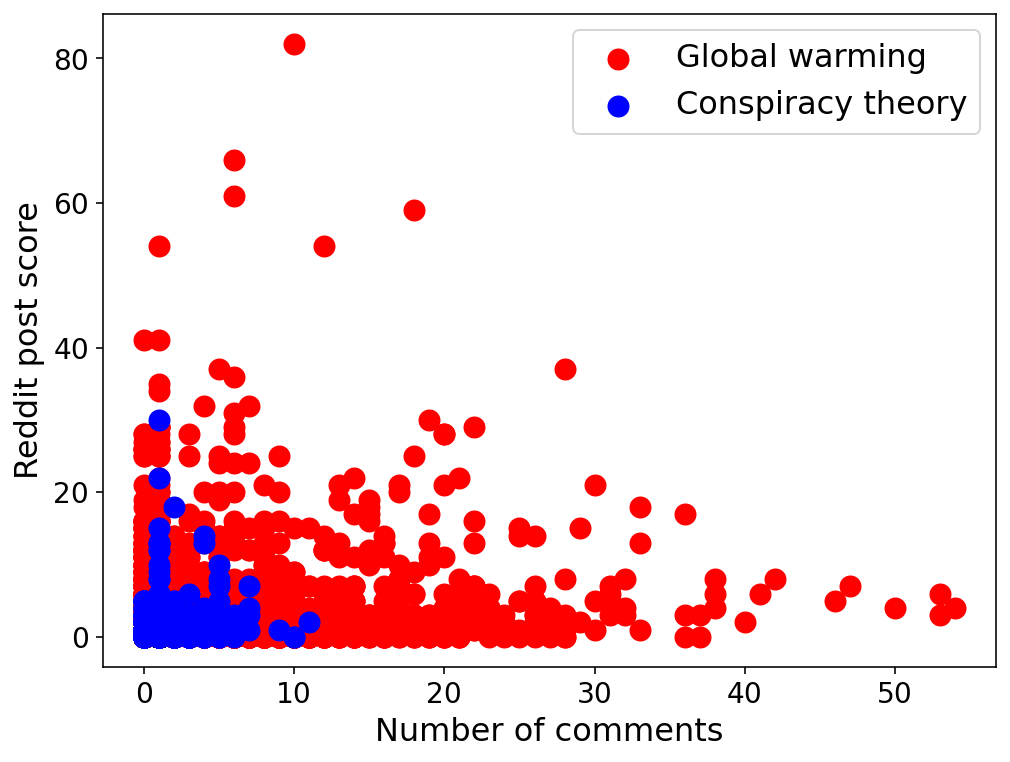

In [25]:
column1 = 'score'
column2 = 'num_comments'

plt.figure(figsize=(8,6))

#POlotting target 1

x_plt = (df_reddit[sub_gw_mask][column1])
y_plt = df_reddit[sub_gw_mask][column2]

plt.scatter(x_plt, y_plt, color="red", s= 100)
#plt.errorbar(x_mean_plt, y_mean_plt, xerr=x_err_plt, yerr=y_err_plt)

x_plt = (df_reddit[sub_ct_mask][column1])
y_plt = df_reddit[sub_ct_mask][column2]

plt.scatter(x_plt, y_plt, color="blue", s = 100)

#plt.title('Correlation between post length and sentiment score per target groups', fontsize=20)
plt.legend(['Global warming', 'Conspiracy theory'],fontsize = 16)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("Reddit post score", fontsize = 16)
plt.xlabel("Number of comments", fontsize = 16);
#plt.xscale("log")

plt.savefig("../plots/EDA_numberofcomments.png")

## Engineering a new varible based on above plot

In [26]:
column1 = 'score'
column2 = 'num_comments'
df_reddit["reaction*"] = df_reddit[column1] * df_reddit[column2]


## Testing the feature:

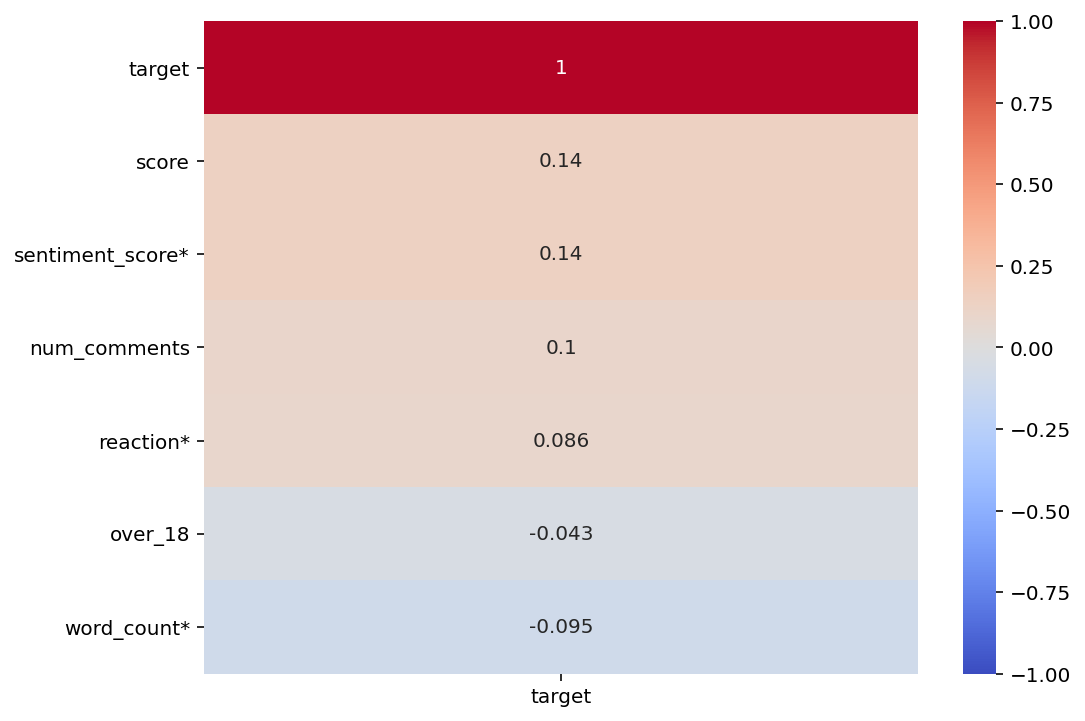

In [27]:
df_reddit_corr = df_reddit.drop(columns=["created_utc"]).corr()

#plt.figure(figsize=(6,6))
plt.figure(figsize=(8,6))
sns.heatmap(df_reddit_corr[['target']].sort_values(by=['target'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);
plt.savefig("../plots/EDA_corr_plots_newfeature.png")

Ok, good!

# Text features extration

### Count vectorization (cvec)

In [28]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['http', 'would', 'com']
stopwords.extend(newStopWords)


cvec = CountVectorizer(stop_words=stopwords, min_df=4, max_df=1.0,
                      ngram_range=(1,2))


In [29]:
term_mat = cvec.fit_transform(df_reddit['text_merged'])

Feature numbers:

In [30]:
len(cvec.get_feature_names())

4273

In [31]:
term_df = pd.DataFrame(term_mat.toarray(), columns=cvec.get_feature_names())

term_df.insert(0, 'targets', targets)

By transposing the outputing and sorting by one of our groups, we can see what our most prevalent words are. <br>
Then, I grab the list of the top 20 terms in each of our classes.

### So, here are the top-used words by both groups!

In [32]:
top_words_ct = list(term_df.groupby('targets').
    mean().T.sort_values(0, ascending=False).head(20).index)

top_words_gw = list(term_df.groupby('targets').
    mean().T.sort_values(1, ascending=False).head(20).index)

top_words_overlap = [word for word in top_words_gw if word in top_words_ct]
top_words_overlap

['year', 'world', 'peopl', 'like', 'make', 'use', 'think', 'could', 'time']

### Visualizing the top-used words:

In [33]:
def plot_cvec_dist(words, dataframe, target = 'targets', classes = [0,1]):
    nrows = len(words)//2 if not len(words)%2 else len(words)//2 + 1
    class_0 = dataframe[dataframe[target]==classes[0]]
    class_1 = dataframe[dataframe[target]==classes[1]]
    fig, ax = plt.subplots(ncols=2, nrows=nrows, figsize=(20, 7*nrows))
    ax = ax.ravel()
    
    for i, word in enumerate(words):
        counts_0 = class_0[word].value_counts().to_dict()
        counts_1 = class_1[word].value_counts().to_dict()
        mean_0 = class_0[word].mean()
        mean_1 = class_1[word].mean()
        ax[i].bar(counts_0.keys(), counts_0.values(), color='goldenrod', alpha=.3)
        for keys, values in counts_0.items():
            ax[i].text(keys-.1, values, s=values, fontsize=14, color='goldenrod')
        for keys, values in counts_1.items():
            ax[i].text(keys+.1, values, s=values, fontsize=14, color='grey')
        ax[i].bar(counts_1.keys(), counts_1.values(), color='grey', alpha=.3)
        ymin, ymax = ax[i].get_ylim()
        #ax[i].plot([mean_0]*2, [ymin, ymax], ':', color='goldenrod')
        #ax[i].plot([mean_1]*2, [ymin, ymax], ':', color='grey')
        ax[i].set_title(f'{word} frequency counts\nmeans: {mean_0:0.02f} vs {mean_1:0.02f}')
        ax[i].legend(classes)

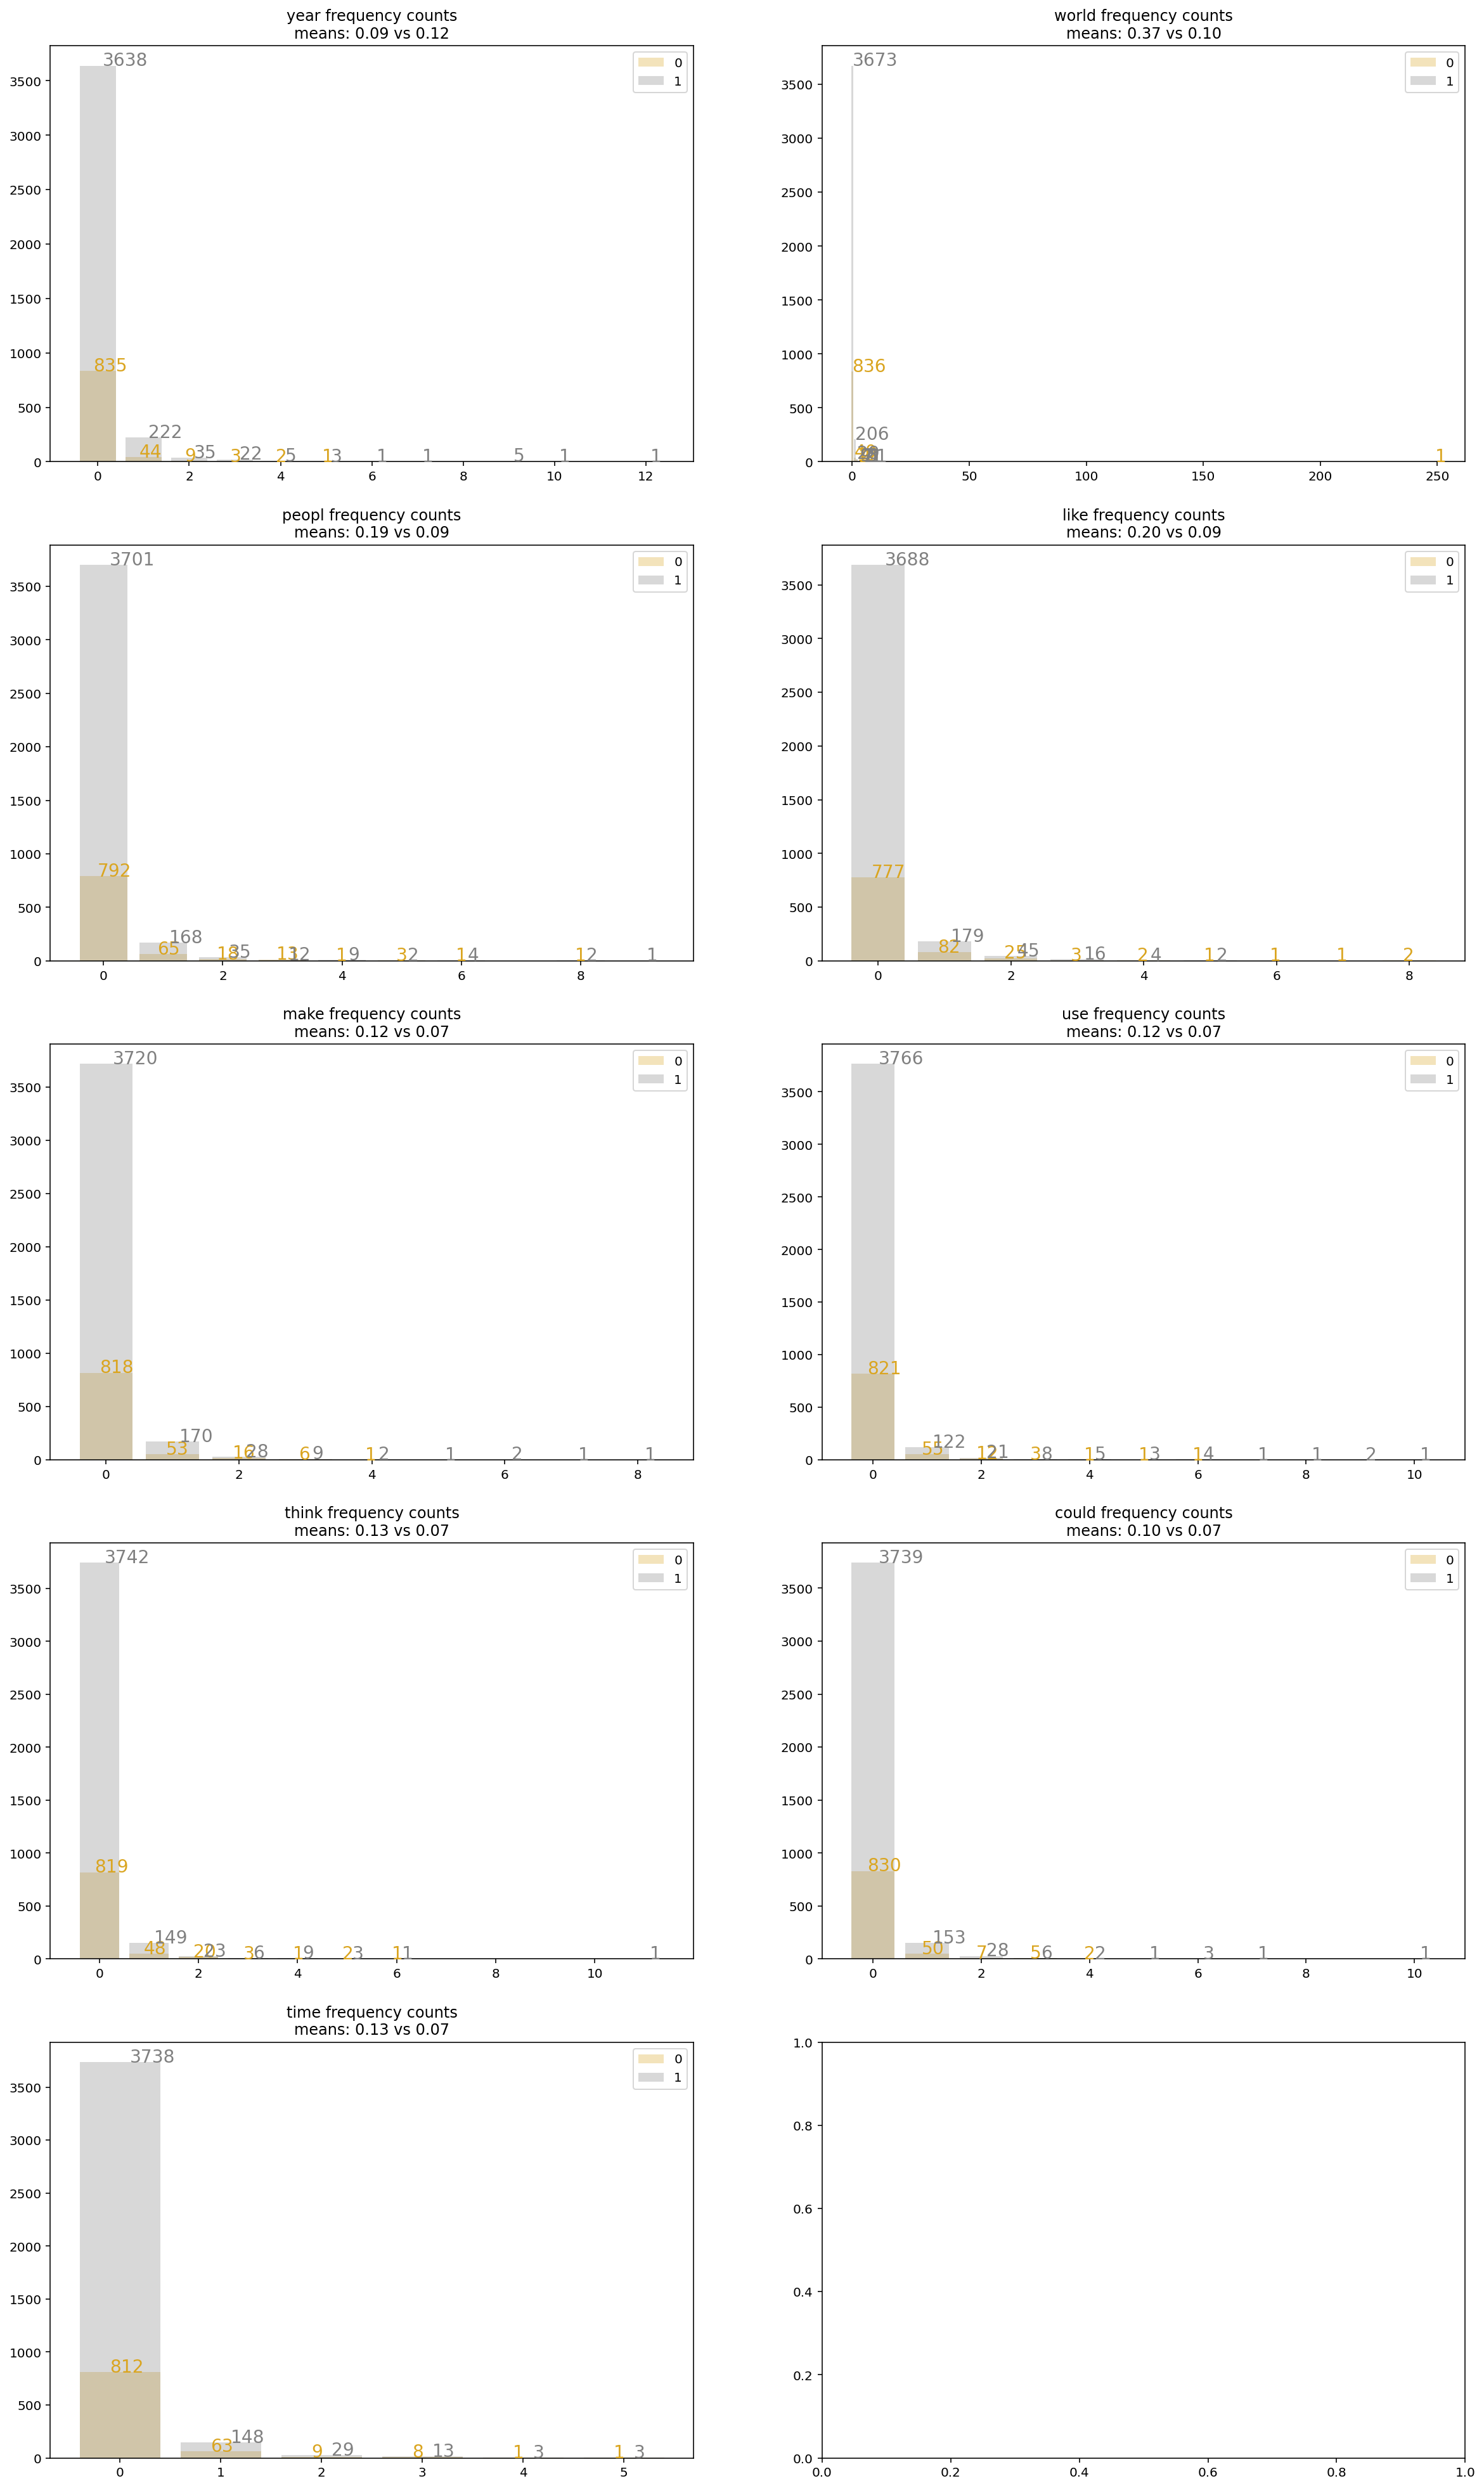

In [34]:
plot_cvec_dist(top_words_overlap, term_df)

### Pickling the dataframe as they are large!

In [35]:
pickle.dump(df_reddit, open('../datasets/df_reddit_for_model.pkl', 'wb'))

In [36]:
print("Hello world!")

Hello world!
